# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd

student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

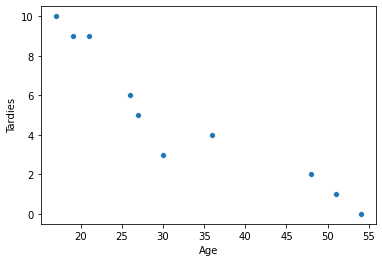

In [2]:
import seaborn as sns

sns.scatterplot(x='Age', y='Tardies', data=student_data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [3]:
# Your response here. 
# If the student is younger the number of tardies is higher

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
# Your response here.
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [5]:
student_data.corr(method='pearson')

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [6]:
#Covariance and correlation measure the relation between to numeric columns.
#Covariance indicates the direction, and correlation normalizes the covariance.
#The results confirm the statement above.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [7]:
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [8]:
# Your response here.

model = LinearRegression()

X = student_data[["Age"]]

y = student_data["Tardies"]

model.fit(X,y)

model.score(X,y)

y_pred = model.predict(X)

Plot your regression model on your scatter plot.

In [11]:
slope, intercept, r , pval, std_err = stats.linregress(student_data['Age'], student_data['Tardies'])

print('Slope: ',slope)
print('Intercept: ',intercept)
print('r: ', r)
print('p_val: ', pval)
print('std_err: ', std_err)

Slope:  -0.2428207709159808
Intercept:  12.888803363135768
r:  -0.9391626886887121
p_val:  5.56665383455343e-05
std_err:  0.03139728816158607


In [14]:
r ** 2

0.8820265558250108

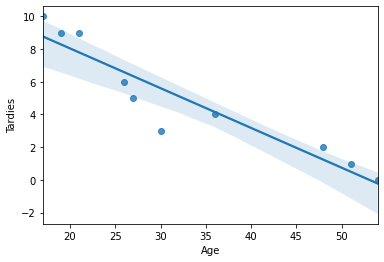

In [15]:
sns.regplot(data=student_data, x='Age', y='Tardies');

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [16]:
# Your response here. 
'''
As we have a r squared of 0.88, we can rely on the fact that age is a good predictor of tardiness '''

'\nAs we have a r squared of 0.88, we can rely on the fact that age is a good predictor of tardiness '

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [17]:
# Import any libraries you may need & the data
df = pd.read_csv('vehicles.csv')
df.head()


,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [19]:
# Your response here. 
df.corr()['CO2 Emission Grams/Mile'].loc[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']].sort_values(ascending=False)

CO2 Emission Grams/Mile    1.000000
Fuel Barrels/Year          0.986189
Fuel Cost/Year             0.930865
Cylinders                  0.752393
Year                      -0.222300
Combined MPG              -0.926229
Name: CO2 Emission Grams/Mile, dtype: float64

In [20]:
#The most important is Fuel Barrels/Year and Combined MPG
#The least important is Year

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [27]:
from sklearn.model_selection import train_test_split

X = df[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']] 

y = df['CO2 Emission Grams/Mile']

model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

model.fit(X_train, y_train)

print(model.score(X_train,y_train))

print(model.score(X_test,y_test))

0.979682101787458
0.9834957046168551


In [30]:
model.coef_

array([-0.33516654,  1.91739767, 18.63349403, -3.22964207,  0.03393844])

In [31]:
y_pred = model.predict(X)

In [32]:
mean_absolute_error(y, y_pred)

7.816076660190727

In [33]:
r2_score(y, y_pred)

0.9808473108663058

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

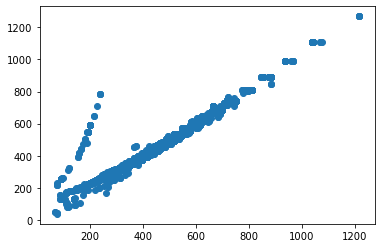

In [36]:
import matplotlib.pyplot as plt

plt.scatter(y_pred,y);

In [37]:
#The most important variable taking a look at model.coef_ is "Fuel Barrels/Year" 
#As we have a r squared of 0.98, we can rely on the fact that all variables are dependents.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [38]:
# Your code here. 
parties = pd.DataFrame({'people_invited': [1,3,4,6,8,9,11,14], 'people_attended': [1,2,4,4,5,7,8,13]})
parties

,people_invited,people_attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [39]:
# Your code here.
slope, intercept, r, p_val, std_err = stats.linregress(parties.people_invited, parties.people_attended)

print('Slope: ',slope)
print('Intercept: ',intercept)
print('r: ', r)
print('p_val: ', p_val)
print('std_err: ', std_err)

Slope:  0.8484848484848485
Intercept:  -0.43939393939393945
r:  0.9652303546573691
p_val:  0.00010236374464090686
std_err:  0.09380896778286217


In [41]:
r ** 2

0.9316696375519905

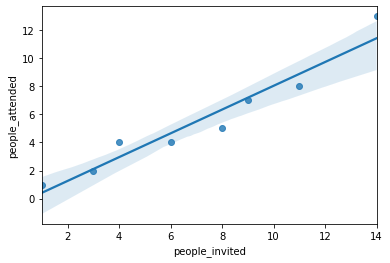

In [42]:
sns.regplot(data=parties, x="people_invited", y="people_attended");

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [47]:
# Your response here. 
#At first sight there is a clear relation between both variables. With more people invited, more people attended.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

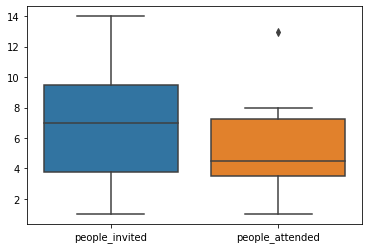

In [44]:
# Your response here. 
sns.boxplot(data=parties);

In [45]:
#There is only one outlier in people_attended

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [46]:
# Your response here. 
#Not done as with the results we are not able to establish how import is that oulier in people_attended